In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel('student.xlsx')
df1 = pd.read_csv('student4.csv')
df2 = pd.read_excel('interviewer_rating.xlsx')
print(df1)

   stuid     name  marks
0      6  Atharva     98
1      7     Arti     97
2      8  Prakash     57
3      9   sanjay     68
4     10   pramod     35


In [5]:
avg= df2[['studentid','rating']].groupby('studentid').mean()
print(avg)

           rating
studentid        
1            4.50
2            3.50
3            3.75
4            4.50
5            3.75
6            3.25
7            4.00
8            3.75
9            4.50
10           3.25


In [10]:
df_merged = pd.concat([df, df1], ignore_index=True)
# df_merged.reset_index()
df_merged.index = df_merged.index + 1
print(df_merged)

    stuid     name  marks
1       1    Rajan     98
2       2   Revati     97
3       3   mugdha     57
4       4    Gauri     68
5       5  manjiri     70
6       6  Atharva     98
7       7     Arti     97
8       8  Prakash     57
9       9   sanjay     68
10     10   pramod     35


In [19]:
df3 = pd.concat([df_merged, avg], axis=1)
print(df3.set_index('stuid'))

          name  marks  rating
stuid                        
1        Rajan     98    4.50
2       Revati     97    3.50
3       mugdha     57    3.75
4        Gauri     68    4.50
5      manjiri     70    3.75
6      Atharva     98    3.25
7         Arti     97    4.00
8      Prakash     57    3.75
9       sanjay     68    4.50
10      pramod     35    3.25


In [20]:
def myconvert(rating,marks):
    if rating>4 and marks>80 :
        return 'Python Project'
    elif rating>3 and marks>90:
        return 'Java Project'
        
    elif rating>4:
        return 'Python Training'
    else:
        return 'Java Training'
df3['technology'] = df3.apply(lambda row: myconvert(row['rating'], row['marks']), axis=1)
df3

,stuid,name,marks,rating,technology
1,1,Rajan,98,4.50,Python Project
2,2,Revati,97,3.50,Java Project
3,3,mugdha,57,3.75,Java Training
4,4,Gauri,68,4.50,Python Training
5,5,manjiri,70,3.75,Java Training
6,6,Atharva,98,3.25,Java Project
7,7,Arti,97,4.00,Java Project
8,8,Prakash,57,3.75,Java Training
9,9,sanjay,68,4.50,Python Training
10,10,pramod,35,3.25,Java Training


In [22]:
#Location Column:
def myconvert(marks):
    if marks>80 :
        return 'Pune'
    elif 70<=marks<=80:
        return 'Delhi'
    else:
        return 'Mumbai'
df3['location'] = df3['marks'].apply(myconvert)
df3

,stuid,name,marks,rating,technology,location
1,1,Rajan,98,4.50,Python Project,Pune
2,2,Revati,97,3.50,Java Project,Pune
3,3,mugdha,57,3.75,Java Training,Mumbai
4,4,Gauri,68,4.50,Python Training,Mumbai
5,5,manjiri,70,3.75,Java Training,Delhi
6,6,Atharva,98,3.25,Java Project,Pune
7,7,Arti,97,4.00,Java Project,Pune
8,8,Prakash,57,3.75,Java Training,Mumbai
9,9,sanjay,68,4.50,Python Training,Mumbai
10,10,pramod,35,3.25,Java Training,Mumbai


<Axes: xlabel='location', ylabel='count'>

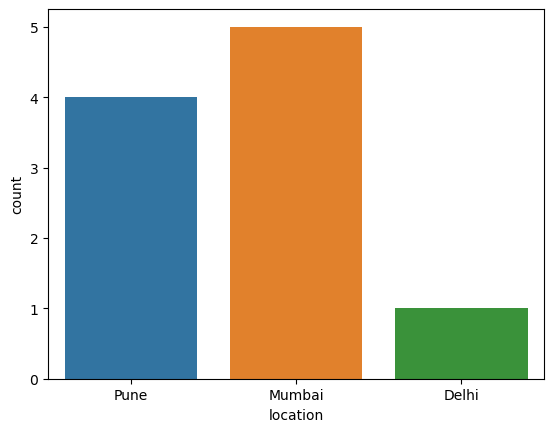

In [24]:
sns.countplot(x="location",data=df3)

<Axes: xlabel='technology', ylabel='count'>

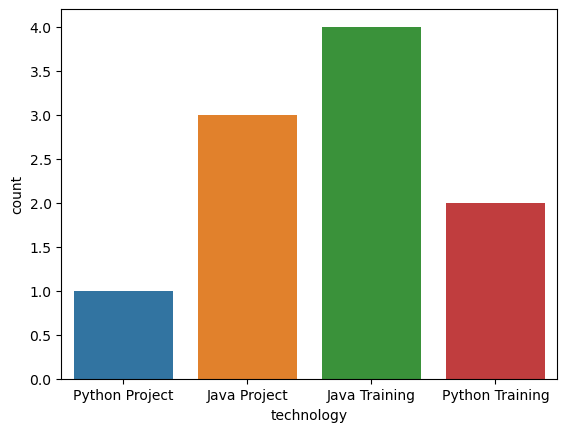

In [25]:
sns.countplot(x="technology",data=df3)